In [11]:
# ## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

# **Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform 
# business strategies and decision-making.

# **Dataset**: This lab utilizes the [Amazon UK product dataset]
# (https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
# which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. 
# You'll need to download it to start working with it.

# -- 




import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [12]:
df = pd.read_csv("/Users/martinoalonso/Documents/Anaconda/Labs/Lab 4/lab-eda-bivariate/amz_uk_price_prediction_dataset.csv")

In [13]:
unique_values = df['category'].unique()
print(unique_values)

['Hi-Fi Speakers' 'CD, Disc & Tape Players' 'Wearable Technology'
 'Light Bulbs' 'Bathroom Lighting' 'Heating, Cooling & Air Quality'
 'Coffee & Espresso Machines' 'Lab & Scientific Products' 'Smart Speakers'
 'Motorbike Clothing' 'Motorbike Accessories' 'Motorbike Batteries'
 'Motorbike Boots & Luggage' 'Motorbike Chassis'
 'Handmade Home & Kitchen Products' 'Hardware'
 'Storage & Home Organisation' 'Fireplaces, Stoves & Accessories'
 'PC Gaming Accessories' 'USB Gadgets' 'Blank Media Cases & Wallets'
 'Car & Motorbike' 'Boys' 'Sports & Outdoors' 'Microphones'
 'String Instruments' 'Karaoke Equipment' 'PA & Stage'
 'General Music-Making Accessories' 'Wind Instruments' 'Handmade Gifts'
 'Fragrances' 'Calendars & Personal Organisers' 'Furniture & Lighting'
 'Computer Printers' 'Ski Goggles' 'Snowboards' 'Skiing Poles'
 'Downhill Ski Boots' 'Hiking Hand & Foot Warmers' 'Pet Supplies'
 'Plants, Seeds & Bulbs' 'Garden Furniture & Accessories'
 'Bird & Wildlife Care' 'Storage & Organisation

In [14]:
# ### Part 1: Analyzing Best-Seller Trends Across Product Categories

# **Objective**: Understand the relationship between product categories and their best-seller status.

# 1.1. **Crosstab Analysis**:
#     - Create a crosstab between the product `category` and the `isBestSeller` status.

crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

   
#     - Are there categories where being a best-seller is more prevalent? 

crosstab_result["bs_proportion"] = crosstab_result[True] / (crosstab_result[False] + crosstab_result[True])

crosstab_result_sorted = crosstab_result.sort_values(by="bs_proportion", ascending=False)

crosstab_result_sorted

##Yes Grocery, Smart Home Security, Personal Care.... 

#     	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the 
# categories based on this proportion in descending order.*

isBestSeller,False,True,bs_proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [15]:
# 1.2. Statistical Tests:

# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
# Compute Cramér's V to understand the strength of association between best-seller status and category.

from scipy.stats import chi2_contingency

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36684.23786636857, 0.0)

In [16]:
#Cramer's 'v'

#from scipy.stats.contingency import association
#association(crosstab_result,method='cramer')

In [17]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


<Figure size 1000x600 with 0 Axes>

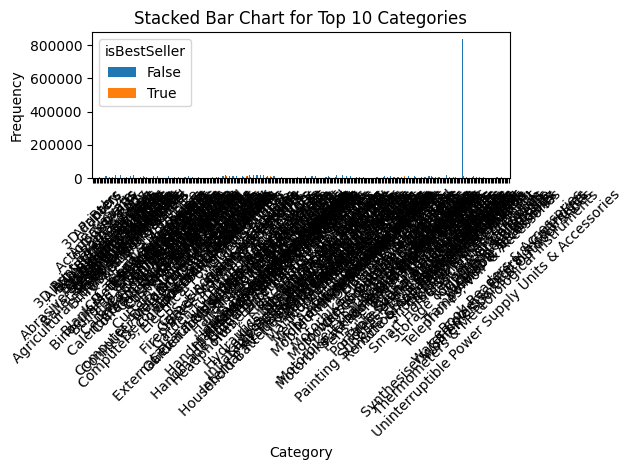

In [18]:
# 1.3. Visualizations:

# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
# Plotting a stacked bar chart for the 'crosstab_result' data
# First, determine the top 10 categories based on frequency


# Filter the DataFrame to include only the rows corresponding to the top 10 categories


# Proceed with visualization using the new contingency table
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
# Create a stacked bar chart of frequencies for each category
crosstab_result.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

##We see that the results are a mess. We will filter by number of best seller

<Figure size 1000x600 with 0 Axes>

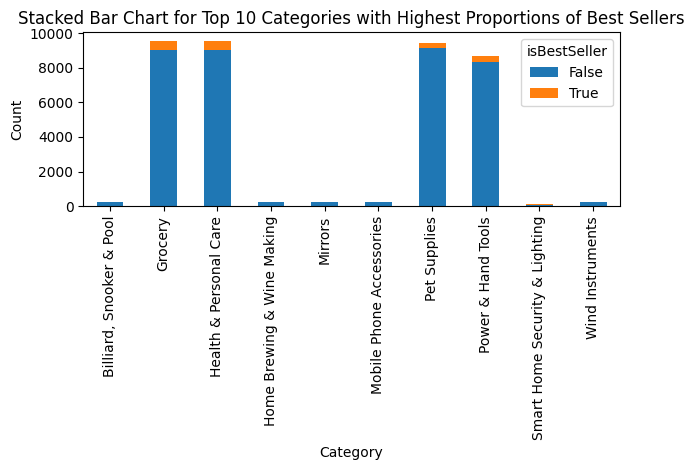

In [19]:
# Calculate the proportion of best sellers for each category
category_counts = df['category'].value_counts()
best_seller_counts = df[df['isBestSeller'] == True]['category'].value_counts()
proportions = best_seller_counts / category_counts

# Select the categories with the highest proportions
top_categories = proportions.nlargest(10).index

# Filter the DataFrame to include only the rows corresponding to the top categories
df_top_categories = df[df['category'].isin(top_categories)]

crosstab_result = pd.crosstab(df_top_categories['category'], df_top_categories['isBestSeller'])

# Proceed with visualization using the contingency table
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
# Create a stacked bar chart using the contingency table
crosstab_result.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Top 10 Categories with Highest Proportions of Best Sellers')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [20]:
crosstab_result

isBestSeller,False,True
category,,
"Billiard, Snooker & Pool",241,8
Grocery,9008,556
Health & Personal Care,9017,552
Home Brewing & Wine Making,239,7
Mirrors,243,7
Mobile Phone Accessories,248,11
Pet Supplies,9152,285
Power & Hand Tools,8353,306
Smart Home Security & Lighting,98,6


In [21]:

# ### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

# **Objective**: Investigate how different product categories influence product prices.

# 0. **Preliminary Step: Remove outliers in product prices.**



# 	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile 
# minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed 
# from the dataset. The next steps will be done with the dataframe without outliers.
	
# 	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

## FROM the lesson: 

def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers


tukeys_test_outliers(df['price'])


# ---

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64

In [22]:
def flooring_capping(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace the outliers
    data = np.where(data>upper_bound,upper_bound,np.where(data<lower_bound,lower_bound,data))
    return data

flooring_capping(df['price'])

array([21.99, 23.99, 21.99, ..., 52.99, 79.99, 53.99])

In [23]:
df['price'] = flooring_capping(df['price']) ##to replace the column by the one with the function applied to it

##test again for outliers

print(tukeys_test_outliers(df['price']))

## no more outliers



Series([], Name: price, dtype: float64)


/var/folders/g4/xn5x8vvs1wn45zdrg3yft5bw0000gn/T/ipykernel_6393/1207170279.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_categories, x='price', y='category', palette="coolwarm")


<Axes: xlabel='price', ylabel='category'>

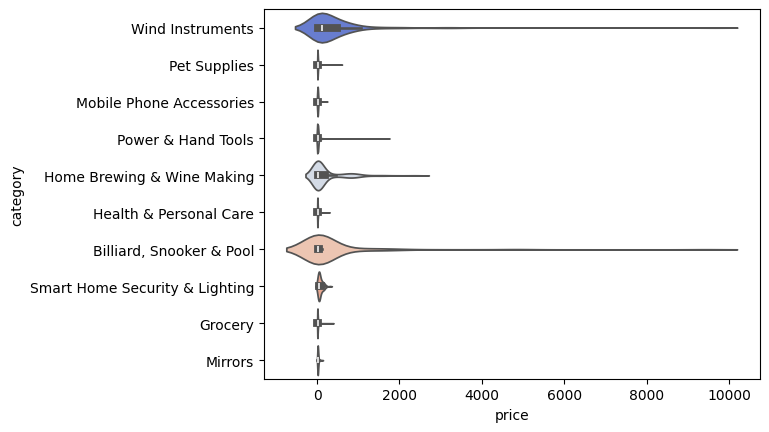

In [24]:
# 1. **Violin Plots**:
#     - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.

sns.violinplot(data=df_top_categories, x='price', y='category', palette="coolwarm")

#tried using orient = 'v' but wouldn't load

#     - Which product category tends to have the highest median price? Don't filter here by top categories.


## sns.violinplot(data=df, x='price', y='category', palette="coolwarm")


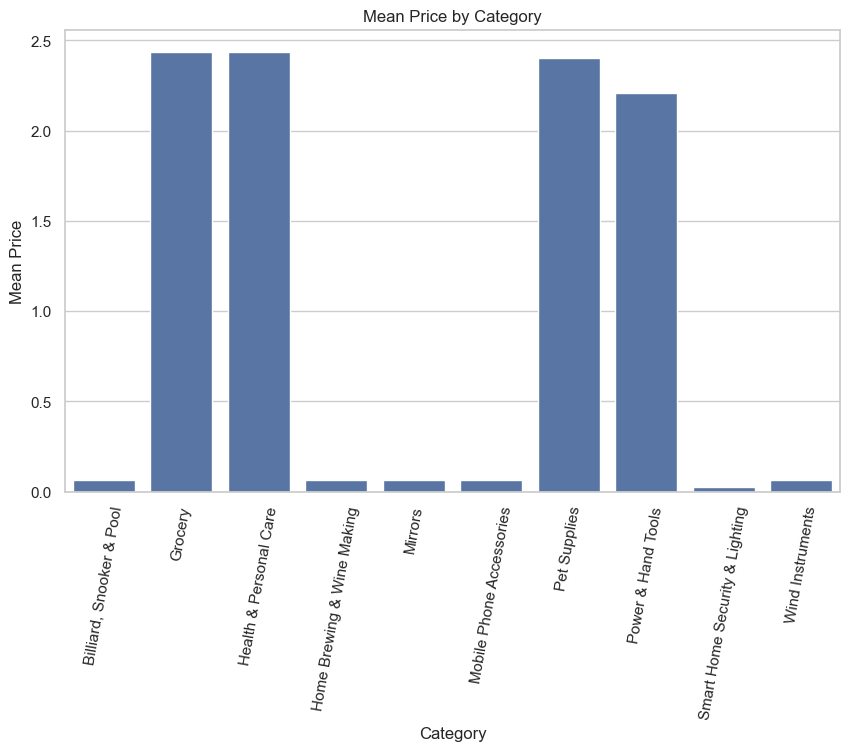

In [31]:
# Bar Charts:

# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

# Which product category commands the highest average price? Don't filter here by top categories.

crosstab_result = pd.crosstab(df_top_categories['category'], df_top_categories['price'])
plt.figure(figsize=(10, 6))
sns.barplot(data=crosstab_result, x=crosstab_result.index, y=crosstab_result.mean(axis=1))
plt.xticks(rotation=80)
plt.xlabel('Category')
plt.ylabel('Mean Price')
plt.title('Mean Price by Category')
plt.show()

/var/folders/g4/xn5x8vvs1wn45zdrg3yft5bw0000gn/T/ipykernel_6393/2667931587.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=crosstab_result, x=df_top_categories['category'], y=df_top_categories['stars'], palette="coolwarm")


<Axes: xlabel='category', ylabel='stars'>

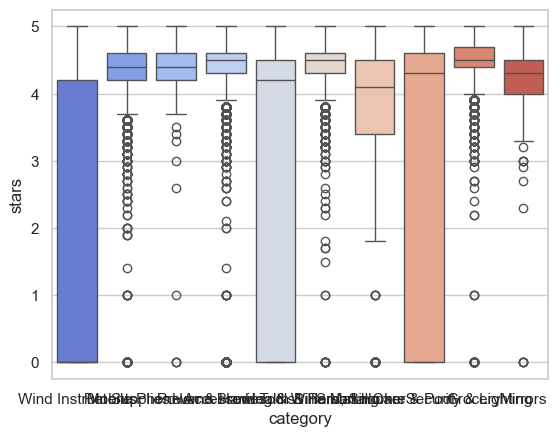

In [33]:
# Box Plots:

# Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.

sns.boxplot(data=crosstab_result, x=df_top_categories['category'], y=df_top_categories['stars'], palette="coolwarm")

# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

/var/folders/g4/xn5x8vvs1wn45zdrg3yft5bw0000gn/T/ipykernel_6393/996535396.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(data=crosstab_result, x=df_top_categories['category'], y=df_top_categories['stars'], palette="coolwarm")
/var/folders/g4/xn5x8vvs1wn45zdrg3yft5bw0000gn/T/ipykernel_6393/996535396.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')


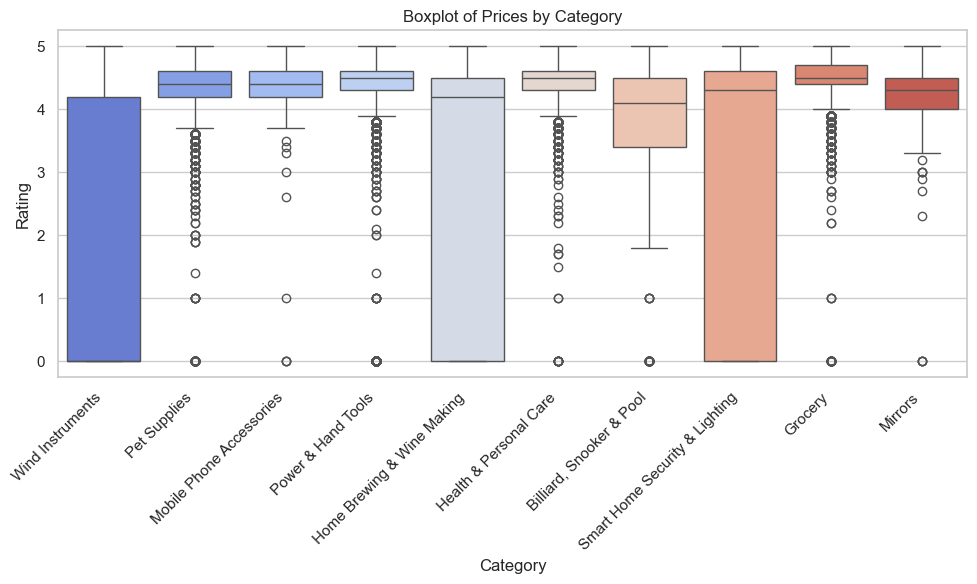

In [35]:
# Set the style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(data=crosstab_result, x=df_top_categories['category'], y=df_top_categories['stars'], palette="coolwarm")

# Customize labels and title
boxplot.set(xlabel='Category', ylabel='Rating', title='Boxplot of Prices by Category')

# Rotate x-axis labels for better readability
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# ### Part 3: Investigating the Interplay Between Product Prices and Ratings

# **Objective**: Analyze how product ratings (`stars`) correlate with product prices.

# 1. **Correlation Coefficients**:
#     - Calculate the correlation coefficient between `price` and `stars`.
#     - Is there a significant correlation between product price and its rating?
	
# 2. **Visualizations**:
#     - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
#     - Use a correlation heatmap to visualize correlations between all numerical variables.
#     - Examine if product prices typically follow a normal distribution using a QQ plot. 

# ---

# **Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

# **Bonus**: 

# - Do the same analysis without taking out the outliers. What are your insights?